In [1]:
import pandas as pd 

In [3]:
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [4]:
movies.head

<bound method NDFrame.head of       movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama

In [5]:
ratings.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]>

In [6]:
df = ratings.merge(movies, on="movieId", how="inner")
df.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp                           title  \
0            1        1     4.0   964982703                Toy Story (1995)   
1            1        3     4.0   964981247         Grumpier Old Men (1995)   
2            1        6     4.0   964982224                     Heat (1995)   
3            1       47     5.0   964983815     Seven (a.k.a. Se7en) (1995)   
4            1       50     5.0   964982931      Usual Suspects, The (1995)   
...        ...      ...     ...         ...                             ...   
100831     610   166534     4.0  1493848402                    Split (2017)   
100832     610   168248     5.0  1493850091   John Wick: Chapter Two (2017)   
100833     610   168250     5.0  1494273047                  Get Out (2017)   
100834     610   168252     5.0  1493846352                    Logan (2017)   
100835     610   170875     3.0  1493846415  The Fate of the Furious (2017)   

                     

In [7]:
df = df.drop(columns=["timestamp"])
df.head

<bound method NDFrame.head of         userId  movieId  rating                           title  \
0            1        1     4.0                Toy Story (1995)   
1            1        3     4.0         Grumpier Old Men (1995)   
2            1        6     4.0                     Heat (1995)   
3            1       47     5.0     Seven (a.k.a. Se7en) (1995)   
4            1       50     5.0      Usual Suspects, The (1995)   
...        ...      ...     ...                             ...   
100831     610   166534     4.0                    Split (2017)   
100832     610   168248     5.0   John Wick: Chapter Two (2017)   
100833     610   168250     5.0                  Get Out (2017)   
100834     610   168252     5.0                    Logan (2017)   
100835     610   170875     3.0  The Fate of the Furious (2017)   

                                             genres  
0       Adventure|Animation|Children|Comedy|Fantasy  
1                                    Comedy|Romance  
2  

In [8]:
df_genres = df['genres'].str.get_dummies('|')  # Splitting genres and creating binary columns
df = pd.concat([df, df_genres], axis=1)  # Merging with the original DataFrame
df.drop(columns=['genres'], inplace=True)  # Dropping original 'genres' column

In [9]:
df.head

<bound method NDFrame.head of         userId  movieId  rating                           title  \
0            1        1     4.0                Toy Story (1995)   
1            1        3     4.0         Grumpier Old Men (1995)   
2            1        6     4.0                     Heat (1995)   
3            1       47     5.0     Seven (a.k.a. Se7en) (1995)   
4            1       50     5.0      Usual Suspects, The (1995)   
...        ...      ...     ...                             ...   
100831     610   166534     4.0                    Split (2017)   
100832     610   168248     5.0   John Wick: Chapter Two (2017)   
100833     610   168250     5.0                  Get Out (2017)   
100834     610   168252     5.0                    Logan (2017)   
100835     610   170875     3.0  The Fate of the Furious (2017)   

        (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
0                        0       0          1          1         1       1   
1        

In [11]:
df = df.drop(columns=["title"])
df.head

<bound method NDFrame.head of         userId  movieId  rating  (no genres listed)  Action  Adventure  \
0            1        1     4.0                   0       0          1   
1            1        3     4.0                   0       0          0   
2            1        6     4.0                   0       1          0   
3            1       47     5.0                   0       0          0   
4            1       50     5.0                   0       0          0   
...        ...      ...     ...                 ...     ...        ...   
100831     610   166534     4.0                   0       0          0   
100832     610   168248     5.0                   0       1          0   
100833     610   168250     5.0                   0       0          0   
100834     610   168252     5.0                   0       1          0   
100835     610   170875     3.0                   0       1          0   

        Animation  Children  Comedy  Crime  ...  Film-Noir  Horror  IMAX  \
0    

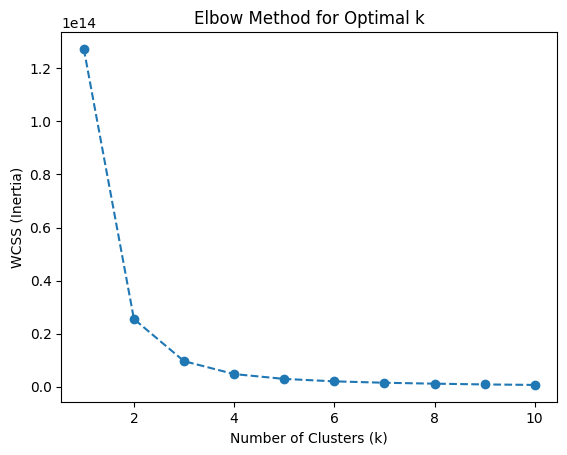

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=2, n_init=10)
    kmeans.fit(df)  # df should contain only numerical features (ratings + one-hot genres)
    wcss.append(kmeans.inertia_)  # Inertia = sum of squared distances to closest cluster center

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()
